<a href="https://colab.research.google.com/github/mariojack1994/TCC.PUC/blob/main/Sommelir_virtual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [20]:
arquivo = pd.read_csv('/wine_dataset.csv')


In [21]:
y = arquivo['style']

In [22]:
x = arquivo.drop('style', axis = 1)

In [23]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3)

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()

In [25]:
print (arquivo.shape,
      x_treino.shape,
      x_teste.shape,
      x_treino.shape,
      x_teste.shape)

(6497, 13) (4547, 12) (1950, 12) (4547, 12) (1950, 12)


In [26]:
modelo.fit(x_treino, y_treino)

ExtraTreesClassifier()

In [27]:
resultado = modelo.score(x_teste, y_teste)
print("Acurácia:", resultado)

Acurácia: 0.9974358974358974


In [28]:
y_teste[400:405]

3545    white
2987    white
2974    white
5684    white
989       red
Name: style, dtype: object

In [29]:
x_teste[400:405]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3545,6.4,0.220,0.32,12.0,0.066,57.0,158.0,0.99920,3.60,0.43,9.0,6
2987,7.3,0.180,0.29,1.2,0.044,12.0,143.0,0.99180,3.20,0.48,11.3,7
2974,6.2,0.300,0.32,1.7,0.032,30.0,130.0,0.99110,3.28,0.41,11.2,7
5684,7.4,0.260,0.29,3.7,0.048,14.0,73.0,0.99150,3.06,0.45,11.4,6
989,9.7,0.295,0.40,1.5,0.073,14.0,21.0,0.99556,3.14,0.51,10.9,6


In [30]:
previsoes = modelo.predict(x_teste[400:405])
print(previsoes)

['white' 'white' 'white' 'white' 'red']


In [31]:
limites_superiores = x_treino.mean() + 3 * x_treino.std()
limites_inferiores = x_treino.mean() - 3 * x_treino.std()

outliers = (x_treino > limites_superiores) | (x_treino < limites_inferiores)
numero_outliers_por_variavel = outliers.sum()
print(numero_outliers_por_variavel)

fixed_acidity           85
volatile_acidity        68
citric_acid             17
residual_sugar          18
chlorides               75
free_sulfur_dioxide     27
total_sulfur_dioxide     7
density                  3
pH                      23
sulphates               54
alcohol                  1
quality                 22
dtype: int64


In [32]:
print("Contagem inicial de cada classe:")
print(arquivo['style'].value_counts())

Contagem inicial de cada classe:
style
white    4898
red      1599
Name: count, dtype: int64


In [33]:
vinhos_tintos = arquivo[arquivo['style'] == 0]
vinhos_brancos = arquivo[arquivo['style'] == 1]

In [45]:
print(arquivo['style'].unique())


['red' 'white']


In [46]:
arquivo['style'] = arquivo['style'].replace({'red': 0, 'white': 1})


In [47]:
print(arquivo['style'].unique())


[0 1]


In [50]:
print(arquivo.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  style  
0      9.4        5      0  
1      9.8        5      0  

In [52]:
vinhos_brancos = arquivo[arquivo['style'] == 1]


In [53]:
print("Número de vinhos brancos no DataFrame original:", len(vinhos_brancos))


Número de vinhos brancos no DataFrame original: 4898


In [54]:
vinhos_brancos_desbalanceados = vinhos_brancos.sample(n=1000, replace=True)


In [55]:
base_desbalanceada = pd.concat([vinhos_tintos, vinhos_brancos_desbalanceados])


In [56]:
print("\nContagem da nova base de dados desbalanceada:")
print(base_desbalanceada['style'].value_counts())


Contagem da nova base de dados desbalanceada:
style
1    1000
Name: count, dtype: int64


In [57]:
print("Valores ausentes antes da limpeza:")
print(arquivo.isnull().sum())

Valores ausentes antes da limpeza:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64


In [58]:
arquivo.fillna(arquivo.mean(), inplace=True)


In [59]:

arquivo.drop_duplicates(inplace=True)

In [60]:

print("\nValores ausentes após a limpeza:")
print(arquivo.isnull().sum())


Valores ausentes após a limpeza:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64


In [61]:
print("\nDuplicatas após a limpeza:")
print(arquivo.duplicated().sum())


Duplicatas após a limpeza:
0


In [62]:
Q1 = arquivo.quantile(0.25)
Q3 = arquivo.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = (arquivo < limite_inferior) | (arquivo > limite_superior)

arquivo_sem_outliers = arquivo[~outliers.any(axis=1)]

numero_outliers_removidos = outliers.sum().sum()
print("Número de outliers removidos:", numero_outliers_removidos)

Número de outliers removidos: 1557


In [63]:
import matplotlib.pyplot as plt

Resumo estatístico antes da remoção dos outliers:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966  

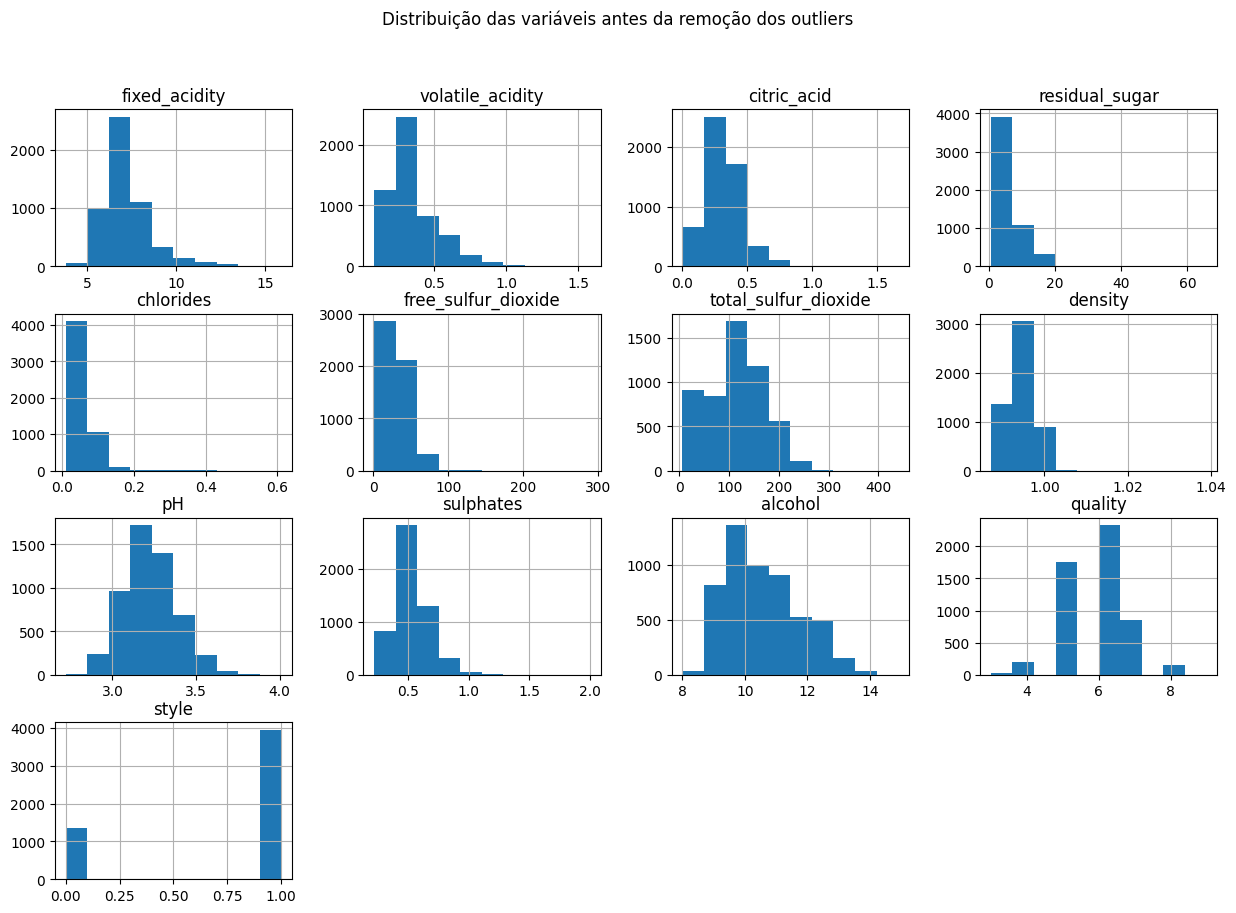


Resumo estatístico após da remoção dos outliers:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4081.000000       4081.000000  4081.000000     4081.000000   
mean        6.961725          0.311032     0.306587        4.937479   
std         0.899279          0.126361     0.115979        4.036692   
min         4.700000          0.080000     0.000000        0.600000   
25%         6.300000          0.220000     0.250000        1.700000   
50%         6.900000          0.280000     0.310000        2.900000   
75%         7.500000          0.370000     0.370000        7.600000   
max         9.600000          0.675000     0.640000       16.050000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4081.000000          4081.000000           4081.000000  4081.000000   
mean      0.048528            30.861799            120.331659     0.993997   
std       0.017336            15.859204             51.630389     0.002643  

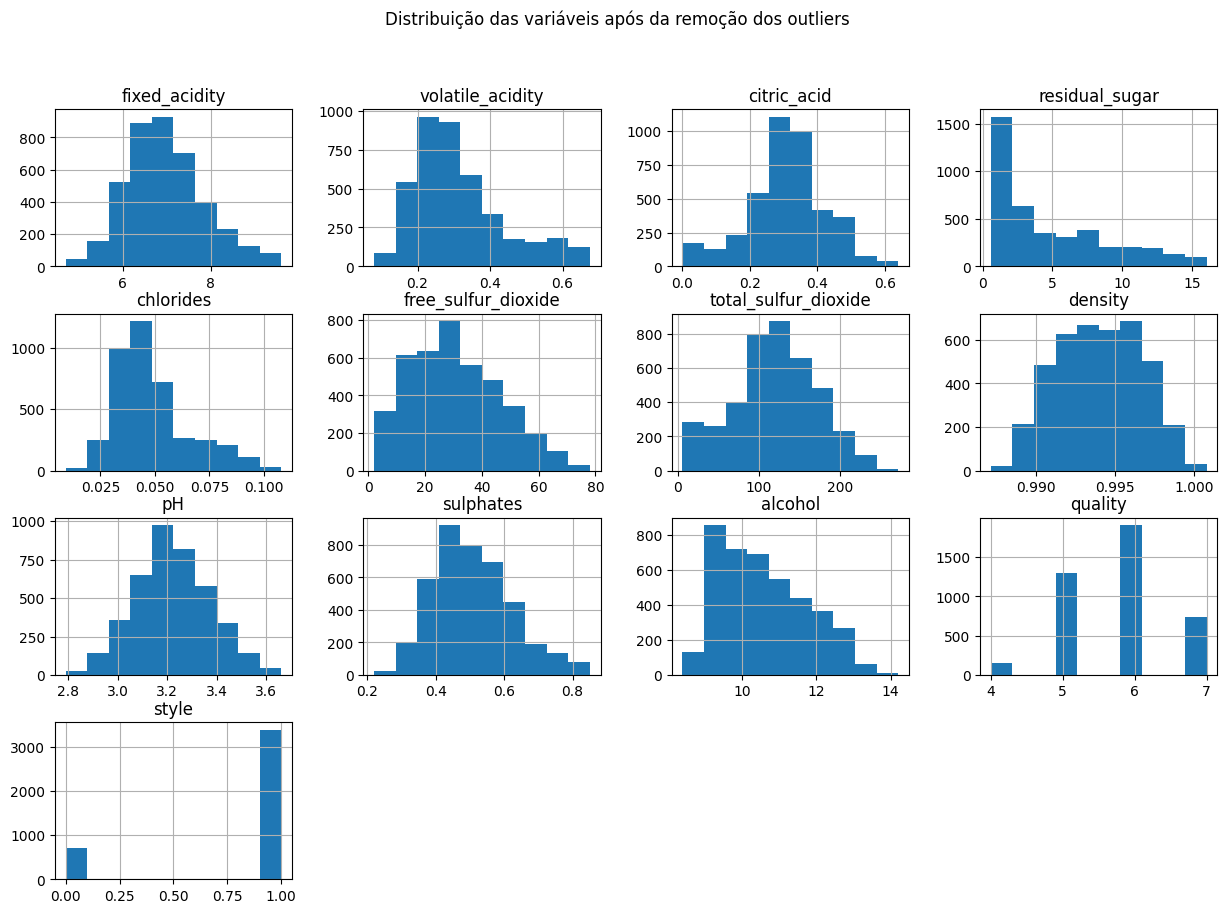

In [64]:
print("Resumo estatístico antes da remoção dos outliers:")
print(arquivo.describe())

arquivo.hist(figsize=(15, 10))
plt.suptitle("Distribuição das variáveis antes da remoção dos outliers")
plt.show()

print("\nResumo estatístico após da remoção dos outliers:")
print(arquivo_sem_outliers.describe())

arquivo_sem_outliers.hist(figsize=(15, 10))
plt.suptitle("Distribuição das variáveis após da remoção dos outliers")
plt.show()

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_treino_balanceado, y_treino_balanceado = smote.fit_resample(arquivo_sem_outliers.drop('style', axis=1), arquivo_sem_outliers['style'])

print("Distribuição das classes após aplicação do SMOTE:")
print(pd.Series(y_treino_balanceado).value_counts())


Distribuição das classes após aplicação do SMOTE:
style
0    3384
1    3384
Name: count, dtype: int64
